## MLFF/BP Workshop

### Unit 2/6: Computational Intelligence I

1. Background information

 We wish to train neural networks to predict the class of a flower in the wellknown
iris flower classification benchmark problem. We are given a data set of
150 samples (patterns) of Iris flowers each with 4 different feature variables
representing petal length, petal width, sepal length and sepal width. Each pattern
falls into one of the three classes.

2. What to do
 Construct neural network models. Use the given data file “iris.csv” to train and
test the network. Note that the last column represents the ‘class label’ as the
output in the given data set.
 Check the NN architecture, the number of training iterations, and network
performance.


In [1]:
#all imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
%matplotlib inline

In [2]:
#read dataset
df = pd.read_csv('../Iris.csv')
df.head(5)

,sepal_l,sepal_w,petal_l,petal_w,species
0,6.3,2.5,5.0,1.9,Iris-virginica
1,5.4,3.0,4.5,1.5,Iris-versicolor
2,6.7,2.5,5.8,1.8,Iris-virginica
3,4.4,3.0,1.3,0.2,Iris-setosa
4,6.3,2.9,5.6,1.8,Iris-virginica


In [3]:
X = df.iloc[:,:4]
y = df['species']
X,y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.model_selection import ShuffleSplit

print("train",X_train.shape)
print("test",X_test.shape)

train (100, 4)
test (50, 4)


In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.01,  hidden_layer_sizes=(5, 2), random_state=1, activation='relu')

In [6]:
fit1 = clf.fit(X_train, y_train)

In [7]:
fit1

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
y_predicted = fit1.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[23,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 15]])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.97999999999999998

So total accuracy is **~ 94.0 %**

### Lets do the MLP with Tensorflow

In [11]:
#
# Parameters
learning_rate = 0.001
training_epochs = 20000
batch_size = 10
display_step = 1000

# Network Parameters
n_hidden_1 = 4 # 1st layer number of features
n_hidden_2 = 4 # 1st layer number of features
n_input = 4 # iris data have 4 features and 1 output with 3 classes
n_classes = 3 # 3 classess 

In [12]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


In [13]:
from sklearn import preprocessing
def one_hot(y_data) :
    enc = preprocessing.LabelEncoder()
    y_data_encoded = enc.fit_transform(y_data)
    print(y_data_encoded)
    a = np.array(y_data_encoded, dtype=int)
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    #print(b)
    return b

In [14]:
y_train = one_hot(y_train)
y_test = one_hot(y_test)

[0 1 2 2 1 0 1 1 2 1 2 1 2 2 1 1 1 0 1 2 1 1 0 1 0 0 1 0 2 2 0 2 2 2 2 1 0
 2 1 1 2 1 2 2 0 1 1 2 2 2 0 0 1 2 1 2 0 2 1 2 1 1 1 0 2 0 1 2 0 1 2 2 0 2
 0 0 0 0 2 0 0 1 1 0 0 1 2 1 2 1 0 2 1 2 0 1 1 2 1 1]
[1 0 0 2 2 0 1 0 2 0 0 2 2 2 2 0 0 1 2 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 2 0 0
 2 2 2 0 0 1 0 0 0 2 2 2 0]


In [15]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [16]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [17]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [18]:
errors = []
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

   
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        X_train, y_train = shuffle(X_train,y_train)
            # Run optimization op (backprop) and cost op (to get loss value)
        #print(y_train.shape)
        _, c = sess.run([optimizer, cost], feed_dict={x: X_train, y: y_train})
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(c))
            errors.append(c)
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: X_test, y: y_test}))

Epoch: 0001 cost= 10.559809685
Epoch: 1001 cost= 0.379522085
Epoch: 2001 cost= 0.167519093
Epoch: 3001 cost= 0.089138925
Epoch: 4001 cost= 0.055779658
Epoch: 5001 cost= 0.038341656
Epoch: 6001 cost= 0.027183132
Epoch: 7001 cost= 0.018204510
Epoch: 8001 cost= 0.010902510
Epoch: 9001 cost= 0.005965963
Epoch: 10001 cost= 0.003138442
Epoch: 11001 cost= 0.001658155
Epoch: 12001 cost= 0.000896269
Epoch: 13001 cost= 0.000496837
Epoch: 14001 cost= 0.000281560
Epoch: 15001 cost= 0.000162388
Epoch: 16001 cost= 0.000094943
Epoch: 17001 cost= 0.000056093
Epoch: 18001 cost= 0.000033375
Epoch: 19001 cost= 0.000020064
Optimization Finished!
Accuracy: 0.98


/usr/local/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


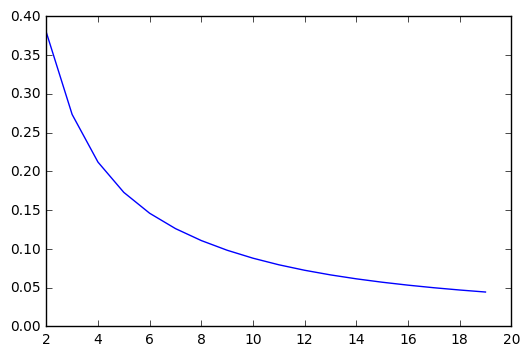

In [21]:
import matplotlib.pyplot as plt
plt.plot([np.mean(errors[1:i]) for i in range(len(errors))])
plt.show()

Total Accuracy ** 98% **